# Pie chart of peoples email domains  
*Author : Maroua EL imame*

This notebook 'assignment03-pie.ipynb' was created to :
- read and analyze the email domains used by 1000 individuals in the provided csv file, downloadable through   
url : https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download

- to generate a Pie chart to show how the different domains are distributed across the dataset. 



### Import Python libraries

In [45]:
# Python library : for data manipulation with dataframes
import pandas as pd 
# Python library : for creating visualization and plots
import matplotlib.pyplot as plt 
# Python colors package built on top of Matplotlib.
import seaborn as sns



### URL where to download CSV file 


In [46]:
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"

### Read the csv file into a pd dataframe


In [47]:
df = pd.read_csv(url)
df


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer
...,...,...,...,...,...,...,...,...,...
995,996,fedF4c7Fd9e7cFa,Kurt,Bryant,Female,lyonsdaisy@example.net,021.775.2933,1959-01-05,Personnel officer
996,997,ECddaFEDdEc4FAB,Donna,Barry,Female,dariusbryan@example.com,001-149-710-7799x721,2001-10-06,Education administrator
997,998,2adde51d8B8979E,Cathy,Mckinney,Female,georgechan@example.org,+1-750-774-4128x33265,1918-05-13,Commercial/residential surveyor
998,999,Fb2FE369D1E171A,Jermaine,Phelps,Male,wanda04@example.net,(915)292-2254,1971-08-31,Ambulance person


Code explained :  

 - access the 'Email' column in df  
 - split the email string around the '@' separator/delimiter and access the second part  
 - create a new column to only extract email domains  
 - show both email and domains columns

*code used in this cell is mainly based on the lecture material, [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html#pandas.Series.str.split) and [geeksforgeeks](https://www.geeksforgeeks.org/python/python-extract-domain-name-from-email-address  ).* 



In [48]:
df['domain'] = df['Email'].str.split('@').str[1]
# show df with only email and domain columns
df[['domain','Email']]


,domain,Email
0,example.org,pwarner@example.org
1,example.net,fergusonkatherine@example.net
2,example.org,fhoward@example.org
3,example.com,zjohnston@example.com
4,example.net,elin@example.net
...,...,...
995,example.net,lyonsdaisy@example.net
996,example.com,dariusbryan@example.com
997,example.org,georgechan@example.org
998,example.net,wanda04@example.net


### Count the frequency of each email domain ronw in df  


Code explained :  
*value_counts()* returns a series in descending order ( from most frequently occurent to least ). This series contain the frequency of each distinct row in the Dataframe.  
Method on *[Pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts)*

In [49]:
# value_counts() returns a series in descending order ( from most frequently occurent to least ). This series contain the frequency of each distinct row in the Dataframe.
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html#pandas.DataFrame.value_counts

domains_count = df[['domain']].value_counts()
domains_count

domain     
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64

## Pie chart  

Resources :  

Matplotlib [ documentation ](https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html)  
Pandas indexing [documentation ](https://pandas.pydata.org/docs/user_guide/indexing.html)  
Pandas [Index.to_list](https://pandas.pydata.org/docs/reference/api/pandas.Index.to_list.html#pandas.Index.to_list) method  
w3schools [Page](https://www.w3schools.com/python/matplotlib_pie_charts.asp) 

In [50]:
# convert pandas Index object to a regular Python list
# returns the domains names
domains_count.index.get_level_values(0).tolist()

['example.org', 'example.com', 'example.net']

Code explained:  

-  plt.fig() :  create a figure and adjust its size  
-  plt.pie() parameters : autopct='%1.1f%%'( show one valeu after decimal point), startangle=160 ( pie chart rotation ), colors=sns.color_palette('rocket') 
-  plt.legend() parameters : bbox_to_anchor=(1.1, 9) the distance between the legend box and the chart 
-  add label (df.index.get_level_values(0).tolist()) method , legend ( adjust its location ) and title

Text(0.5, 1.0, 'Distribution of email domains within 1000 individuals')

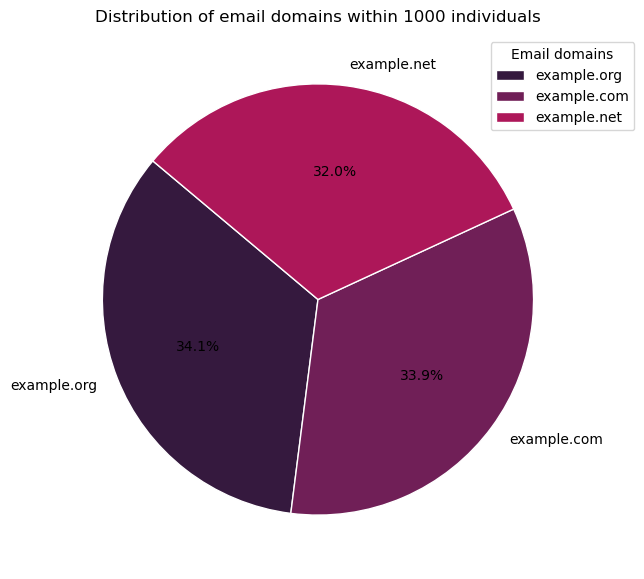

In [51]:
plt.figure(figsize=(8, 7))
labels = domains_count.index.get_level_values(0).tolist()
plt.pie(domains_count, labels = labels ,  autopct='%1.1f%%' , startangle= 140, colors=sns.color_palette('rocket'), wedgeprops={"edgecolor": "white"})
plt.legend(title='Email domains', loc='upper right', bbox_to_anchor=(1.1, 0.99))
plt.title('Distribution of email domains within 1000 individuals')


Analysis of Pie chart  
This pie chart shows the distribution of 3 email domains : example.net , example.org. example.com  
Each slice represents an email domain occurence and together they make up 100% of the dataset.  
Every slice represents a different percentage of data, which means the domains distribution is not equal.  